In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Dummy dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


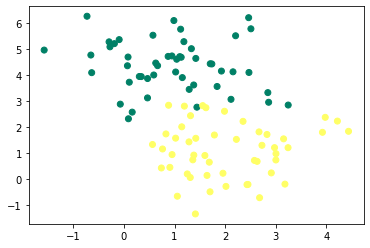

In [5]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()


```
X = [x1^(1) ... xn^(1) 
     x1^(2)     xn^(2)
     .
     .
     .
     x1^(m)     xn^(m)] ∈ Rmxn



W = [w1 
     w2
     .
     .
     .
     wn] ∈ Rnx1

b ∈ R
```

In [6]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)



```
Z = X * W + b

A = 1 / (1 + e^(-Z))
```



In [7]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

L = - 1/m ∑ y * log(A) + (1 - y) * log(1 - A)

In [8]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

dw = ∂L/∂W = 1/m* X^T * (A -y)

db = ∂L/∂b = 1/m ∑ ( A -y )

In [9]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

W = W - α*∂L/∂W

b = b - α* ∂L/∂b

In [10]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [31]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
def artificial_neuron(X, y, learning_rate = 0.1, nombre_iter = 100):
    # initialisation parametres W, b
    W, b = initialisation(X)

    Loss = []

    #learning by repetition nombre_iter times
    for i in range(nombre_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

0.92


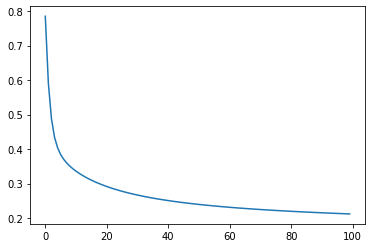

In [27]:
W, b = artificial_neuron(X, y)

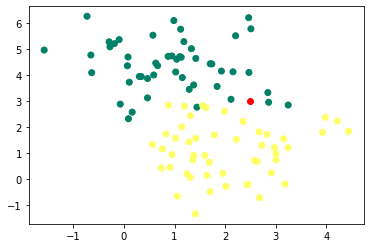

[0.56631926]


array([ True])

In [41]:
new_plant = np.array([2.5, 3])
plt.scatter(new_plant[0], new_plant[1], c='r', cmap='summer')
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()
predict(new_plant, W, b)

z(X1, X2) = 0


> Indented block


W1X1 + W2X2 + b = 0


> Indented block


X2 = (-W1X1 - b/W2)




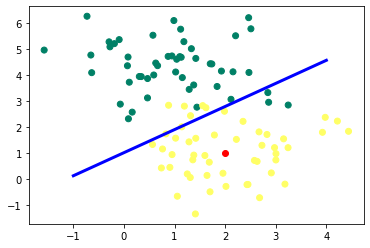

[0.882976]


array([ True])

In [43]:
new_plant = np.array([2, 1])

x1 = np.linspace(-1, 4, 100)
x2 = (-W[0] * x1 -b) / W[1]

plt.scatter(new_plant[0], new_plant[1], c='r', cmap='summer')
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.plot(x1, x2, c='blue', lw=3)
plt.show()
predict(new_plant, W, b)